In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pde
import os

ROOT = "."
SIM = 0 # choose
FIGURES_FOLDER = ROOT + f"/Figures/sim{SIM}/"
SIM_FOLDER = ROOT + f"/Simulations/sim{SIM}/"

if not os.path.exists(FIGURES_FOLDER):
    os.mkdir(FIGURES_FOLDER)
if not os.path.exists(SIM_FOLDER):
    os.mkdir(SIM_FOLDER)

In [18]:
def G(rho, p, P):
  return p*(1-rho/P)

# 1D parameter derivation:
# delta^2 / (1*tau) -> D for delta, tau -> 0
# Du = theta_u * D
# Di = theta_i * D

delta = 0.05 # mm
tau = 0.2 # h
D = delta**2/(2*tau)
Du = Di = 1.88e-4 # mm^2/h
theta_u = Du/D
theta_i = Di/D
beta = 1.02e-1 # h-1
p = 1.87e-2 # h-1
q = 4.17e-2 # h-1
P = K = 1e3 # 1/mm^2
c_max = int(K*delta)
Ru = 2.6 # mm
Ri = 1 # mm
pop_unit = 1

In [19]:
def initialize_mesh(delta, Ru, Ri, c_max):
  initial_u = int(.9*K)
  initial_i = int(.1*K)
  size = int(1/delta * 10 * 2)
  domain = np.zeros((2, size), dtype='uint16')
  for i in range(size):
    if ((i-size/2)*delta)**2 <= (Ru)**2:
      domain[0][i] = initial_u
    if ((i-size/2)*delta)**2 <= (Ri)**2:
      domain[1][i] = initial_i
  return domain

domain = initialize_mesh(delta, Ru, Ri, c_max)

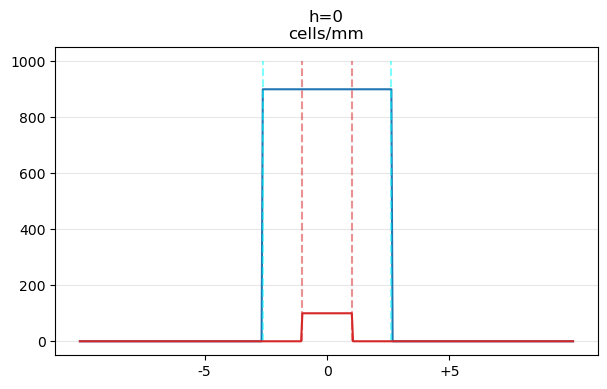

In [20]:
# define functions and parameters to save and plot results

size = int(1/delta * 10 * 2)
ticks = [size//2 - 5//delta, size//2, size//2 + 5//delta]

def plot_domain(domain, h):
  radius_u = (Ru + h*2*np.sqrt(Du*p))/delta
  radius_i = (Ri + h*2*np.sqrt(Di*(beta-q)))/delta
  fig, ax = plt.subplots(figsize=(7, 4))

  # plot U
  plt.plot(domain[0], color="tab:blue")
  ax.set_xticks(ticks)
  ax.set_xticklabels(["-5","0","+5"],rotation=0)
  ax.title.set_text(f"h={h}\ncells/mm")
  plt.vlines([size//2 + radius_u, size//2 - radius_u], 0, c_max/delta, colors=["cyan"], linestyles="dashed", alpha=0.5)
  # plot I
  plt.plot(domain[1], color="tab:red")
  plt.vlines([size//2 - radius_i, size//2 + radius_i], 0, c_max/delta, colors=["tab:red"], linestyles="dashed", alpha=0.5)
  ax.yaxis.grid(alpha=0.3)
  # save and plot figure
  plt.savefig(f"{FIGURES_FOLDER}/random_walk_sim{SIM}_h{h}.png", format='png', dpi=200)
  plt.show()

plot_domain(domain, 0)

In [22]:
from pde.grids.cartesian import CartesianGrid
from pde.pdes.base import PDEBase
from pde.fields.collection import FieldCollection
from pde.fields.scalar import ScalarField
from pde.fields.vectorial import VectorField


# delta = 0.05 # mm
# tau = 0.2 # h
# Du = Di = 1.88e-4 # mm^2/h
# beta = 1.02e-1 # h-1
# p	= 1.87e-2 # h-1
# q	= 4.17e-2 # h-1
# P = K	= 1e3 # 1/mm^2
# Ru = 2.6 # mm
# Ri = 1 # mm

class MorselliPDE(PDEBase):

    def __init__(self, Du=Du, Di=Di, p=p, beta=beta, K=K, q=q, Ru=Ru, Ri=Ri, bc="auto_periodic_neumann"):
        super().__init__()
        self.bc = bc
        self.Du = Du
        self.Di = Di
        self.p = p
        self.beta = beta
        self.K = K
        self.q = q
        self.Ru = Ru
        self.Ri = Ri


    def evolution_rate(self, state, t=0):
        u, i = state  # membrane potential and recovery variable
        u_t = self.Du*u.laplace(bc=self.bc) + self.p*u*(1-(u+i)/self.K) - (self.beta/self.K)*u*i
        i_t = self.Di*i.laplace(bc=self.bc) + (self.beta/self.K)*u*i - self.q*i

        return FieldCollection([u_t, i_t])


grid = CartesianGrid(((-10, 10),), (size))
result = FieldCollection([ScalarField(grid, domain[0]), ScalarField(grid, domain[1])])

# print(state[0].data)
eq = MorselliPDE()
for i in range(1,101):
  print(f"hour {i*10}")
  result = eq.solve(result, t_range=10, dt=0.01)
  np.save(f"{SIM_FOLDER}/pde_random_1d_h{10*i}.npy", result.data)

hour 10


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 20


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 30


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 40


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 50


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 60


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 70


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 80


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 90


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 100


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 110


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 120


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 130


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 140


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 150


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 160


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 170


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 180


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 190


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 200


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 210


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 220


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 230


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 240


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 250


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 260


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 270


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 280


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 290


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 300


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 310


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 320


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 330


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 340


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 350


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 360


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 370


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 380


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 390


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 400


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 410


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 420


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 430


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 440


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 450


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 460


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 470


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 480


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 490


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 500


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 510


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 520


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 530


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 540


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 550


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 560


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 570


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 580


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 590


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 600


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 610


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 620


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 630


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 640


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 650


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 660


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 670


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 680


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 690


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 700


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 710


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 720


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 730


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 740


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 750


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 760


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 770


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 780


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 790


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 800


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 810


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 820


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 830


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 840


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 850


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 860


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 870


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 880


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 890


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 900


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 910


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 920


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 930


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 940


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 950


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 960


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 970


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 980


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 990


  0%|          | 0/10.0 [00:00<?, ?it/s]

hour 1000


  0%|          | 0/10.0 [00:00<?, ?it/s]